# Project: Medical Appointment Attendance Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will be analyzing the attendance of scheduled medical appointments. We will be interested in finding trends for patients who appeared for their scheduled appointments, and those who did not. 

We will be exploring variables such as region, how early the patient scheduled the appointment, and whether the patient received a reminder, and how these variables affected their attendance.

In [1]:
#Import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load the data and then perform an inital inspection to check if the dataset needs to be cleaned.

### General Properties

In [2]:
#Load data into DataFrame

df = pd.read_csv('noshowappointments.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

This dataset has 14 columns and over 110,000 rows. The columns are:

- PatientId
- AppontmentID
- Gender
- ScheduledDay: Date the appointment was scheduled.
- AppointmentDay: Date the appointment occurred.
- Age
- Neighbourhood: Location of hospital where appointment occurred.
- Scholarship: Whether or not the patient is enrolled in a financial assistance program.
- Hipertension: Whether or not the patient has been diagnosed with hipertension.
- Diabetes: Whether or not the patient has been diagnosed with diabetes.
- Alcoholism: Whether or not the patient has been diagnosed with alcoholism.
- Handicap: Whether or not the patient has been diagnosed with a handicap, also rates the severity of the handicap on a scale of 0 to 4, with 0 being not handicapped and 4 being severely handicapped.
- SMS_received: Whether or not an appointment reminder was sent to the patient.
- No-show: Whether or not the patient appeared for their appointment, Yes if the patient did not appear, no if the patient appeared.

The dataset already appears to be very clean. There are no rows that have any null values or NaN values. 
The PatientId and AppointmentID rows can likely be dropped, as they are very specific values and will not produce any value to our analysis. We can also see there there is at least one row with an age of -1, so we may want to remove those from the dataset.

### Data Cleaning

This dataset is already quite clean. We will be making the column headers lowercase for consistency, as well as renaming a couple of them for readability. We will then drop any unnecessary columns or rows.

In [7]:
#Convert all column headers to lower case

df.columns = df.columns.str.lower()

In [8]:
#Drop the patientid and appointmentid columns

df.drop(['patientid', 'appointmentid'], axis = 1, inplace = True)

In [9]:
#Rename some of the column headers to make them more readable

df.rename(columns = {'scheduledday':'scheduled_day', 'appointmentday':'appointment_day', 'no-show':'no_show'}, inplace = True)

In [10]:
#Find rows where age = -1

df.query('age == -1')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
#We see that there is only one row with age = -1, so we can drop that row

df.drop(99832, inplace = True)

In [12]:
df.query('age == -1')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [13]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
df.shape

(110526, 12)

<a id='eda'></a>
## Exploratory Data Analysis


### Are certain regions more likely to have no-shows?

In this section, we will explore whether certain regions have higher rates of patients not appearing for their appointments. We will first create a dataframe that contains the total number of appointments for each neighborhood, as well as the total number of no-shows for each neighborhood. We can then use this information to determine which neighborhoods have the greatest ratio of no-shows per appointment.

In [15]:
#We first create a new dataframe that contains each neighborhood's ammount of appointments scheduled.

neighbourhood_df = pd.DataFrame.from_dict(dict(df['neighbourhood'].value_counts()), orient = 'index', columns = ['total_appointments'])
neighbourhood_df.head()

,total_appointments
JARDIM CAMBURI,7717
MARIA ORTIZ,5805
RESISTÊNCIA,4431
JARDIM DA PENHA,3877
ITARARÉ,3514


In [16]:
#We will then create another DataFrame, which contains the total number of no-shows for each neighborhood.

no_show_neighbourhood_df = pd.DataFrame.from_dict(dict(df.neighbourhood[df['no_show'] == 'Yes'].value_counts()), orient = 'index', columns = ['total_no_shows'])
no_show_neighbourhood_df.head()

,total_no_shows
JARDIM CAMBURI,1465
MARIA ORTIZ,1219
ITARARÉ,923
RESISTÊNCIA,906
CENTRO,703


In [17]:
#We then join the two DataFrames to get the total number of appointments and number of no-shows for each neighbourhood.
joined_df = neighbourhood_df.join(no_show_neighbourhood_df, how = 'inner')
joined_df.head()

,total_appointments,total_no_shows
JARDIM CAMBURI,7717,1465
MARIA ORTIZ,5805,1219
RESISTÊNCIA,4431,906
JARDIM DA PENHA,3877,631
ITARARÉ,3514,923


In [18]:
#Let's create a new column that has the ratio of no-shows to total appointments
joined_df['ratio'] = joined_df['total_no_shows'] / joined_df['total_appointments']
joined_df.head()

,total_appointments,total_no_shows,ratio
JARDIM CAMBURI,7717,1465,0.189841
MARIA ORTIZ,5805,1219,0.209991
RESISTÊNCIA,4431,906,0.204469
JARDIM DA PENHA,3877,631,0.162755
ITARARÉ,3514,923,0.262664


In [19]:
joined_df.describe()

,total_appointments,total_no_shows,ratio
count,80.000000,80.000000,80.000000
mean,1381.562500,278.987500,0.207996
std,1369.156017,278.000751,0.095039
min,2.000000,1.000000,0.085714
25%,420.500000,75.000000,0.180461
50%,854.500000,184.500000,0.197650
75%,2067.000000,428.250000,0.217709
max,7717.000000,1465.000000,1.000000


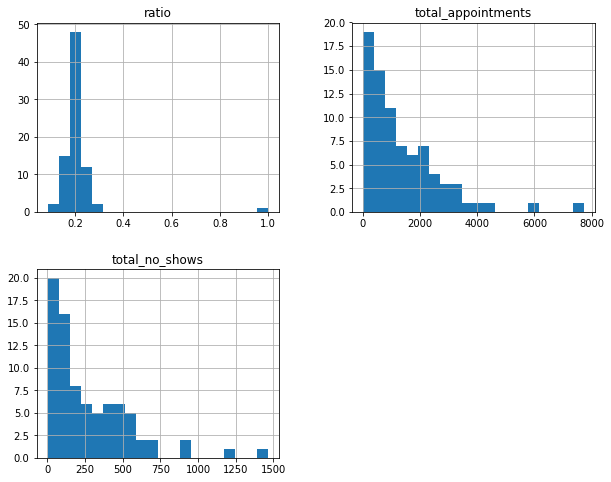

In [20]:
joined_df.hist(bins = 20, figsize = (10,8));

We can see that an average of about 20% of appointments are abandoned. 

In [21]:
joined_df.sort_values(by = 'total_no_shows', ascending = False, inplace = True)
joined_df.head()

,total_appointments,total_no_shows,ratio
JARDIM CAMBURI,7717,1465,0.189841
MARIA ORTIZ,5805,1219,0.209991
ITARARÉ,3514,923,0.262664
RESISTÊNCIA,4431,906,0.204469
CENTRO,3334,703,0.210858


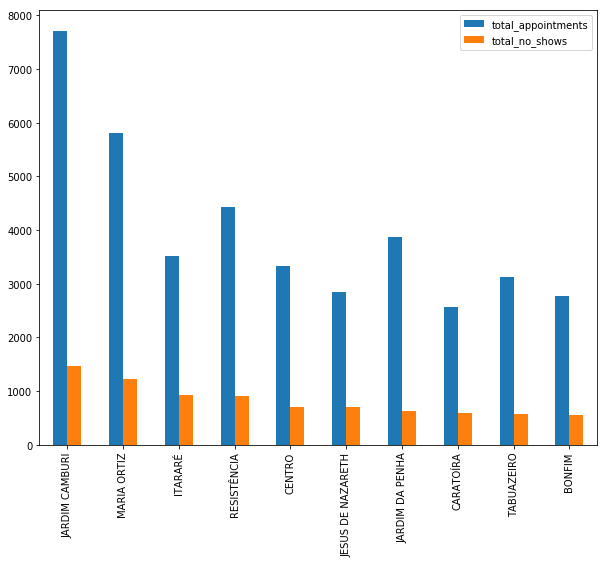

In [22]:
joined_df.iloc[:10, :2].plot(kind = 'bar', figsize = (10,8));

This graph shows a the neighbourhoods with the highest total number of no-shows. It plots the total number of appointments scheduled and compares that to the number of no-shows. We can see that some neighbourhoods, such as Itarare and Jesus de Nazareth, have fewer appointments scheduled, yet still have about the same total number of no-shows as some other neighbourhoods.

In [23]:
joined_df.sort_values(by = 'ratio', ascending = False, inplace = True)
joined_df.head(10)

,total_appointments,total_no_shows,ratio
ILHAS OCEÂNICAS DE TRINDADE,2,2,1.000000
SANTOS DUMONT,1276,369,0.289185
SANTA CECÍLIA,448,123,0.274554
SANTA CLARA,506,134,0.264822
ITARARÉ,3514,923,0.262664
JESUS DE NAZARETH,2853,696,0.243954
HORTO,175,42,0.240000
ILHA DO PRÍNCIPE,2266,532,0.234775
CARATOÍRA,2565,591,0.230409
ANDORINHAS,2262,521,0.230327


Santos Dumont has the highest ratio of no-shows to total appointments, although it does not have as high a number of total appointments as some of the other neighbourhoods. Itarare, Jesus de Nazareth, and Caratoira all have many more total number of appointments, yet still have a very high ratio of total no shows, well above the 75th percentile.

### Are appointments that are scheduled further ahead of the appointment date missed more often?

In this section we will explore the time difference between when an appointment was scheduled and when the appointment occured, and whether greater time differences lead to a higher rate of appointments being abandoned. We will create another new DataFrame to use, which contains the date columns of the original DataFrame, as well as the no_show column. We then clean the dates to be a bit more readable, and then find the number of days between when the appointment was scheduled and when it occurred.

Let us first create a new DataFrame which contains the scheduled_day, appointment_day, and the no_show columns.

In [24]:
schedules_df = df[['scheduled_day', 'appointment_day', 'no_show']].copy()
schedules_df.head()

,scheduled_day,appointment_day,no_show
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,No
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,No
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,No
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,No
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,No


In [25]:
#We are just interested in the time difference between the date the appointment was scheduled, and the appointment day.
#Let's normalize the date so it just includes the year-month-day.

#First we need to convert the date columns in DateTime values.
schedules_df['scheduled_day'] = pd.to_datetime(schedules_df['scheduled_day'])
schedules_df['appointment_day'] = pd.to_datetime(schedules_df['appointment_day'])

#Then we can normalize the values.
schedules_df['scheduled_day'] = schedules_df['scheduled_day'].dt.normalize()
schedules_df['appointment_day'] = schedules_df['appointment_day'].dt.normalize()

In [26]:
schedules_df.head()

,scheduled_day,appointment_day,no_show
0,2016-04-29,2016-04-29,No
1,2016-04-29,2016-04-29,No
2,2016-04-29,2016-04-29,No
3,2016-04-29,2016-04-29,No
4,2016-04-29,2016-04-29,No


In [27]:
#Now let's create a new column that has the difference in number of days between when
#the appointment was scheduled and the date

schedules_df['difference'] = (schedules_df['scheduled_day'] - schedules_df['appointment_day']).dt.days

In [28]:
schedules_df.head()

,scheduled_day,appointment_day,no_show,difference
0,2016-04-29,2016-04-29,No,0
1,2016-04-29,2016-04-29,No,0
2,2016-04-29,2016-04-29,No,0
3,2016-04-29,2016-04-29,No,0
4,2016-04-29,2016-04-29,No,0


In [29]:
schedules_df.query('no_show == "Yes"')['difference'].value_counts()

 0      1792
-2      1602
-7      1309
-4      1231
-1      1113
-6      1001
-14      913
-5       872
-8       670
-3       644
-21      575
-13      536
-28      503
-15      502
-10      440
-9       440
-20      408
-22      404
-19      363
-35      359
-29      356
-12      353
-16      351
-17      350
-27      320
-18      312
-11      312
-23      276
-34      270
-26      263
        ... 
-80        8
-85        8
-89        7
-155       6
-176       6
-104       6
-88        5
-87        5
-81        4
-133       4
 1         4
-142       3
-103       3
-162       2
-179       2
-83        1
-98        1
-169       1
-96        1
-151       1
-126       1
-86        1
-110       1
 6         1
-139       1
-95        1
-111       1
-132       1
-146       1
-102       1
Name: difference, Length: 113, dtype: int64

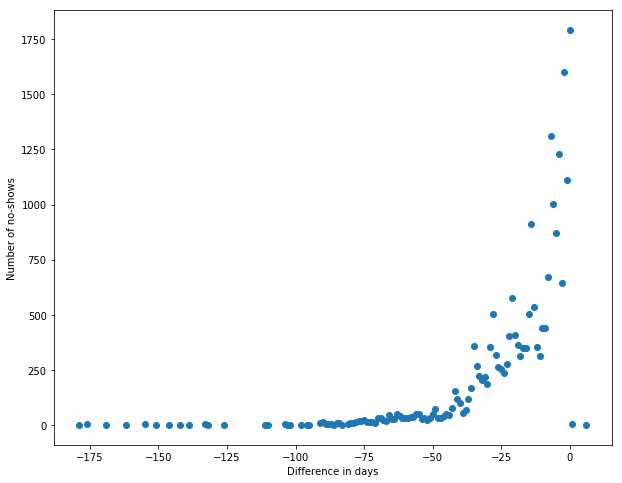

In [30]:
plt.figure(figsize = (10,8));
plt.scatter(schedules_df.query('no_show == "Yes"')['difference'].value_counts().index, schedules_df.query('no_show == "Yes"')['difference'].value_counts())
plt.xlabel('Difference in days')
plt.ylabel('Number of no-shows');

Interestingly, occurences where appointments were scheduled a few days or a week before have a much higher rate of the patient not showing up. The value counts of the top ten differences are all when the appointment was scheduled less than two weeks beforehand. Compared to the lowest counts of differences in no-shows, almost all appointments were schedled over 100 days beforehand. When the appointment was scheduled months in advanced, there is a much lower rate of a no-show.

### Are patients more likely to appear for appointments if they receive a reminder?

In this section we will explore whether patients who received an SMS text reminder about their appointments were more likely to appear than those who recieved no reminder.

In [31]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [32]:
df['sms_received'].mean()

0.3210285362720084

About 32% of the appointments scheduled sent a reminder before hand.

In [33]:
df.groupby('sms_received')['no_show'].value_counts()

sms_received  no_show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: no_show, dtype: int64

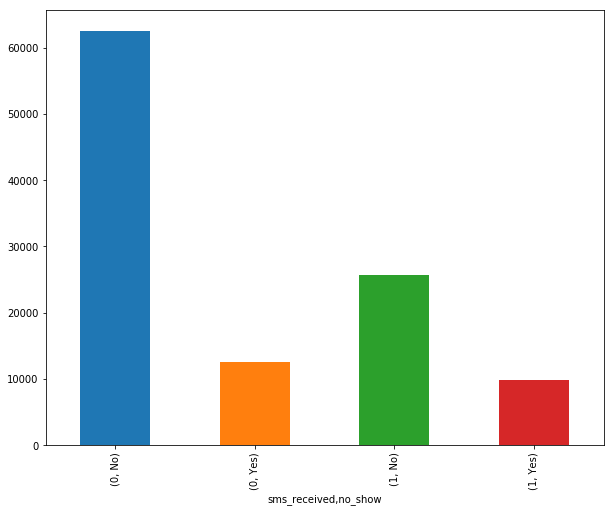

In [34]:
df.groupby('sms_received')['no_show'].value_counts().plot(kind = 'bar', figsize = (10, 8));

Looking at the numbers here, it does not appear that sending a reminder significantly reduced the rate of no-shows. About 20% of appointments were missed when no reminder was sent, however around 38% of appointments were missed when a reminder was sent.

<a id='conclusions'></a>
## Conclusions


Our results for the Neighbourhood analysis show that most neighbourhoods have about a 20% rate of patients not showing for appointments. Even the neighbourhood with the highest rate of no-shows is still within one standard deviation of the mean rate.These findings also do not take into account other factors for these neighbourhoods that may relate to the rate of no-shows, such as neighbourhood demographics or income levels.

It was interesting to see that appointments that were scheduled within two weeks of the appointment date had a much higher number of no-shows than appointments that were scheduled months in advance. This may be due to there just being more appointments scheduled only a few days in advance compared to months in advance. 

SMS text reminders did not appear to influence the rate of no-shows for appointments. In fact, patients who received a reminder missed their appointments at a higher rate than those who did not receive a reminder. 